# Research on Public Opinion about COVID-19

<ul>
    <li>Data Scource: FREE DATASET FROM NEWS/MESSAGE BOARDS/BLOGS ABOUT CORONAVIRUS (4 MONTH OF DATA - 5.2M POSTS</li>
    <li>Citation Author(s):RanGeva</li>
    <li>Data Abstract: Free dataset from news/message boards/blogs about CoronaVirus (4 month of data - 5.2M posts). The time frame of the data is Dec/2019 - March/2020. The posts are in English mentioning at least one of the following: "Covid" OR CoronaVirus OR "Corona Virus".")</li>
    <li>Data Links: https://ieee-dataport.org/open-access/free-dataset-newsmessage-boardsblogs-about-coronavirus-4-month-data-52m-posts</li>
<ul>

## 1. Data Pre-processing

In [1]:
import pandas as pd

# load json
df1 = pd.read_json('data/16119_webhose_2020_01_db21c91a1ab47385bb13773ed8238c31_0000002.json', lines=True)
df2 = pd.read_json('data/16119_webhose_2020_02_db21c91a1ab47385bb13773ed8238c31_0000002.json', lines=True)

# get info
df = pd.concat([df1, df2], ignore_index=True)
df = df.filter(['title','author','thread','published','url','text'], axis=1)
df['country'] = df['thread'].apply(lambda x: x.get('country'))
df['facebook'] = df['thread'].apply(lambda x: x.get('social').get('facebook'))
df['replies_count'] = df['thread'].apply(lambda x: x.get('replies_count'))
df = df.drop('thread', 1)

df

title          author  \
0       Karnataka: Helplines, isolation wards set up f...       Udayavani   
1       Health dept. monitoring 24 people for possible...                   
2                                                                 jmccorm   
3                             Asian Markets Mostly Higher     rttnews.com   
4       Tesla soars as bearish analysts left with litt...      Joe Easton   
...                                                   ...             ...   
106012                                                               Duh!   
106013                                                              Henry   
106014  Wall Street ends in the red as virus fears spo...                   
106015  News outlets weigh whether new virus will affe...  Andrew McKirdy   
106016  PH shares fall back to 7,200 amid lingering CO...    ABS-CBN News   

                            published  \
0       2020-01-31T11:46:00.000+02:00   
1       2020-01-28T02:00:00.000+02:00   
2       2020-01-31T06:38:00.000+02:00   
3       2020-01-31T05:53:00.000+02:00   
4       2020-01-30T02:00:00.000+02:00   
...                               ...   
106012  2020-02-15T18:00:00.000+02:00   
106013  2020-02-15T11:38:00.000+02:00   
106014  2020-02-14T07:00:00.000+02:00   
106015  2020-02-15T22:25:00.000+02:00   
106016  2020-02-14T19:03:00.000+02:00   

                                                      url  \
0       https://m.dailyhunt.in/news/india/english/uday...   
1       http://cnnphilippines.com/videos/2020/1/28/Hea...   
2       https://news.ycombinator.com/item?id=22194798#...   
3       https://www.rttnews.com/3064615/asian-markets-...   
4       http://www.bnnbloomberg.ca/tesla-soars-as-bear...   
...                                                   ...   
106012  https://news.yahoo.com/xi-details-hands-approa...   
106013  https://ph.news.yahoo.com/wandering-ship-becom...   
106014  https://www.urdupoint.com/en/miscellaneous/wal...   
106015  https://www.japantimes.co.jp/news/2020/02/15/n...   
106016  https://news.abs-cbn.com/video/business/02/15/...   

                                                     text country  \
0       Bengaluru: Isolation wards in hospitals across...      IN   
1       The government making sure that the new corona...      US   
2       Apart from more people falling sick (as bad as...      US   
3       Asian stock markets are mostly higher on Frida...      US   
4       Cash flow was also “very strong,” at more than...      CA   
...                                                   ...     ...   
106012  Corona virus is the most effective weapon crea...      US   
106013  Hope they don't bring coronavirus to these poo...      PH   
106014  Wall Street Ends In The Red As Virus Fears Spo...      PK   
106015  Since mid-January, the name on the lips of inc...      JP   
106016  PH shares fall back to 7,200 amid lingering CO...      US   

                                          facebook  replies_count  
0         {'likes': 0, 'shares': 0, 'comments': 0}              0  
1         {'likes': 0, 'shares': 0, 'comments': 0}              0  
2         {'likes': 0, 'shares': 0, 'comments': 0}            266  
3         {'likes': 0, 'shares': 0, 'comments': 0}              0  
4         {'likes': 0, 'shares': 0, 'comments': 0}              0  
...                                            ...            ...  
106012    {'likes': 0, 'shares': 0, 'comments': 0}              6  
106013    {'likes': 0, 'shares': 0, 'comments': 0}             30  
106014    {'likes': 0, 'shares': 0, 'comments': 0}              0  
106015    {'likes': 0, 'shares': 0, 'comments': 0}              0  
106016  {'likes': 62, 'shares': 2, 'comments': 23}              0  

[106017 rows x 8 columns]

## 2. Data Analysis

<ol>
    <li>Number of Entries</li>
    <li>Average Length of Text</li>
    <li>Countries Information</li>
    <li>Top 50 Words by Frequency</li>
    <li>Top 50 Bigrams by Frequency</li>
    <li>Top 50 Bigrams by Mutual Information Scores (using min frequency 5)</li>
</ol>

#### 2.1 Number of Entries

In [2]:
num_of_entries = len(df)
print("Number of Data Entries is: " + str(num_of_entries))

Number of Data Entries is: 106017


#### 2.2 Average Length of Text

In [3]:
avg_len_text = df['text'].apply(len).mean()
print("Average Length of Text is: " + str(round(avg_len_text)))

Average Length of Text is: 3240


#### 2.3 Countries Information

In [4]:
import json

f = open('data/countries_geojson.json',) 
geojson = json.load(f)

df_iso = pd.read_csv("data/country_codes_list.csv")
df_country = df.groupby('country',as_index=False).agg('count')
df_country = df_country[['country','title']]
df_country.columns = ['ISO-alpha-2', 'Post_Count']

df_country = pd.merge(df_country, df_iso, on='ISO-alpha-2')
df_country = df_country[['Country','ISO-alpha-3','Post_Count']]
df_country

Country ISO-alpha-3  Post_Count
0    United Arab Emirates (the)         ARE         595
1                   Afghanistan         AFG           8
2                      Anguilla         AIA           1
3                       Albania         ALB          35
4                       Armenia         ARM          23
..                          ...         ...         ...
139                     Vanuatu         VUT          16
140                       Samoa         WSM           4
141                South Africa         ZAF        2087
142                      Zambia         ZMB           1
143                    Zimbabwe         ZWE          32

[144 rows x 3 columns]

In [5]:
import plotly
import plotly.graph_objects as go

# Visualize Number of Posts for Each Country as Choropleth Map
fig = go.Figure(data=go.Choropleth(locations = df_country['ISO-alpha-3'],
                                   z = df_country['Post_Count'],
                                   text = df_country['Country'],
                                   colorscale=[[0.0, "rgb(0, 68, 112)"],
                                               [0.8, "rgb(0, 121, 201)"],
                                               [0.9, "rgb(0, 138, 227)"],
                                               [0.94,"rgb(2, 130, 214)"],
                                               [0.95, "rgb(0, 154, 255)"],
                                               [0.97, "rgb(43, 173, 252)"],
                                               [0.98, "rgb(97, 195, 255)"],
                                               [0.99, "rgb(184, 228, 255)"],
                                               [1.0, "rgb(188, 212, 227)"]],
                                   autocolorscale=False,
                                   reversescale=True,
                                   marker_line_color='darkgray',
                                   marker_line_width=0.5,
                                   colorbar_title = 'Covid19 Posts'))

fig.update_layout(title_text = 'Worldwide Covid19 Posts in English',
                  title_x = 0.5,
                  geo = dict(showframe = False,
                  showcoastlines = False,
                  projection_type = 'equirectangular'))

fig.show()

#### 2.4 Top 50 Words by Frequency

           Word    Freq
0          Said  341054
1   Coronavirus  292402
2         China  268826
3         Virus  185372
4        Health  174035
5           New  173604
6        People  168737
7      Outbreak  134551
8         Cases  132270
9          Also  120146
10      Chinese  114237
11         2020  107041
12          One   90580
13        Wuhan   89039
14         Year   84960
15        Would   79071
16        First   75316
17        World   75060
18          Two   73894
19         Last   68842
20    Confirmed   67536
21        Could   65367
22       Spread   64124
23         News   63326
24   Government   63188
25          U.s   61778
26      Million   61370
27       Global   60692
28     Reported   60075
29           Us   59363
30       Public   58830
31         Time   58521
32     February   57523
33          Feb   56519
34      Disease   54810
35    Including   53239
36       Number   52959
37         Ship   52954
38         Week   52859
39          May   52483
40   Passengers 

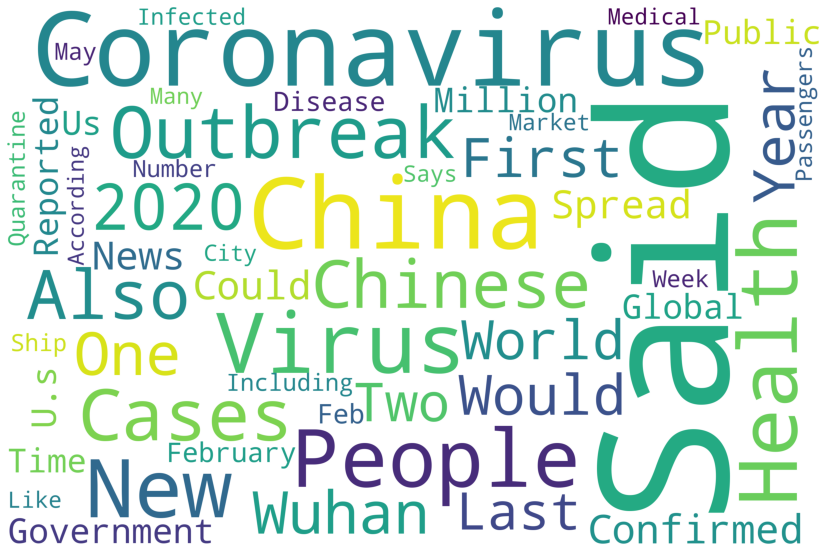

In [6]:
# Get Top 50 Words by Frequency
import nltk
import re
from string import punctuation

text = " ".join(df['text'].str.lower()).split()
stopwords = nltk.corpus.stopwords.words('english') + ['-','—',',','.','–','...','']

word_dist = nltk.FreqDist(w.strip(punctuation).capitalize() for w in text if w.strip(punctuation) not in stopwords)
top_50_words = word_dist.most_common(50)
top_50_words_df = pd.DataFrame(dict(top_50_words).items(), columns=['Word', 'Freq'])
print(top_50_words_df)


# Visualize Top 50 Common Words by WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

wc = WordCloud(background_color="white", mode="RGB", 
               width=3000 , height=2000, 
               max_words=50, 
               normalize_plurals=False).generate_from_frequencies(dict(top_50_words))
plt.figure(figsize = (15,10))
plt.axis('off')
plt.imshow(wc)

#### 2.5 Top 50 Bigrams by Frequency

                Bigrams   Freq
0   CoronavirusOutbreak  43913
1              HongKong  38995
2      NovelCoronavirus  37929
3          PublicHealth  25082
4           WorldHealth  24979
5            CruiseShip  24792
6        ConfirmedCases  24723
7        NewCoronavirus  22523
8               PerCent  22351
9         HubeiProvince  21095
10        MainlandChina  19034
11         UnitedStates  18543
12   HealthOrganization  18129
13             NewCases  17129
14            DeathToll  16370
15             LastYear  16185
16      DiamondPrincess  16119
17             LastWeek  15095
18       TestedPositive  14511
19             NewVirus  14277
20      HealthOfficials  13754
21              NewYear  13053
22              NewYork  11183
23          SocialMedia  10827
24               14Days  10176
25       DiseaseControl  10077
26             TwoWeeks   9924
27     CoronavirusCases   9723
28             LunarNew   9401
29     HealthCommission   9001
30      AssociatedPress   8988
31      

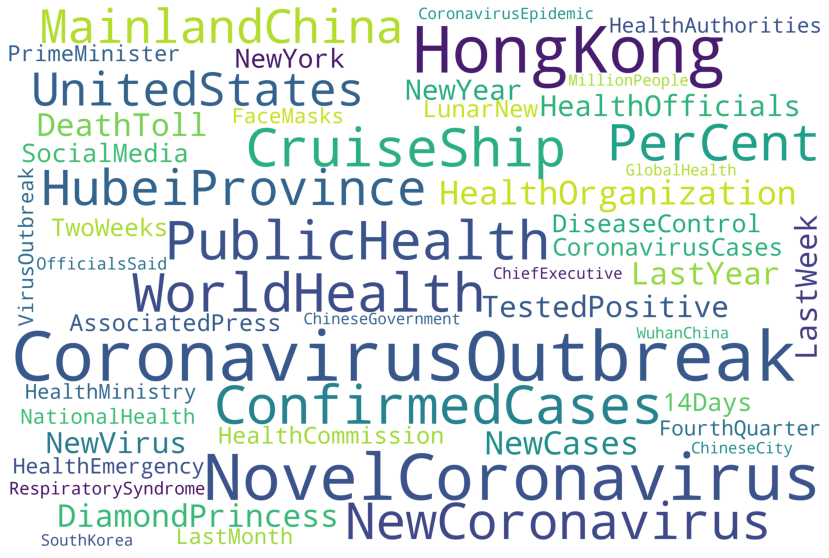

In [7]:
# Get Top 50 Bigrams by Frequency
words_bigrams = list(nltk.bigrams(text))
bigram_dist = nltk.FreqDist(w[0].strip(punctuation).capitalize()+w[1].strip(punctuation).capitalize() for w in words_bigrams 
                            if ((w[0].strip(punctuation) not in stopwords) and (w[1].strip(punctuation) not in stopwords)))
bigram_dist.pop("", None)
top_50_bigrams = bigram_dist.most_common(50)

top_50_bigrams_df = pd.DataFrame(dict(top_50_bigrams).items(), columns=['Bigrams', 'Freq'])
print(top_50_bigrams_df)


# Visualize Top 50 Common Bigrams by WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

top_50_bigrams_dict = dict(zip(top_50_bigrams_df.Bigrams, top_50_bigrams_df.Freq))
wc = WordCloud(background_color="white", mode="RGB", 
               width=3000 , height=2000, 
               max_words=50, 
               normalize_plurals=False).generate_from_frequencies(top_50_bigrams_dict)
plt.figure(figsize = (15,10))
plt.axis('off')
plt.imshow(wc)

#### 2.6 Top 50 Bigrams by Mutual Information Scores (using min frequency 5)

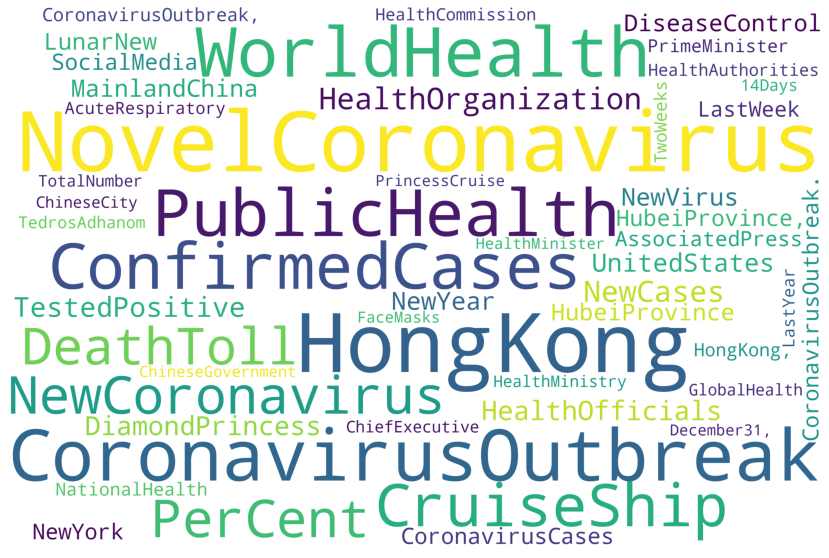

In [8]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text)
finder.apply_freq_filter(5)
scored = finder.score_ngrams(bigram_measures.raw_freq)
scored = [(s[0][0].capitalize()+s[0][1].capitalize(), round(s[1],6)) for s in scored if ((s[0][0] not in stopwords) and (s[0][1] not in stopwords))]
top_50_scored_bigrams_dict = dict(scored[:50])
pd.DataFrame(top_50_scored_bigrams_dict.items(), columns=['Bigrams', 'Mutual Information Score'])


# Visualize Top 50 Scored Bigrams by WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

wc = WordCloud(background_color="white", mode="RGB", 
               width=3000, height=2000, 
               max_words=50, 
               normalize_plurals=False).generate_from_frequencies(top_50_scored_bigrams_dict)
plt.figure(figsize = (15,10))
plt.axis('off')
plt.imshow(wc)